## Exploratory Spatial Data Analysis with Python

Fall 2019 Reston Azure Datafest

[@PratapVardhan](https://twitter.com/PratapVardhan/)

### John Snow

![snow](https://blogs-origin.cdc.gov/publichealthmatters/files/2017/03/Snow-cholera-map-1_banner-1.jpg)
<small>Map of cholera cases in Soho, London, 1854. Source: Wikimedia Commons.</small>

# Maps, Locations, Boundaries, People


<div style="display: flex;"><img src="https://www.gatesnotes.com/-/media/Images/Articles/Health/Polio/GIS-Mapping-GPS-Tracking-for-Polio-in-Nigeria/Digital-Mapping-Gallery/DigiMap_Map01.jpg?h=337&w=600&la=en&hash=2FB749703FF80644CC54ABD624B2ACADD185F265" alt="DigiMap_Map01"><img src="https://www.gatesnotes.com/-/media/Images/Articles/Health/Polio/GIS-Mapping-GPS-Tracking-for-Polio-in-Nigeria/Digital-Mapping-Gallery/DigiMap_Map07.jpg?h=337&w=600&la=en&hash=B398339CA6036CB251E480000BAC0B04E7C0F3E9" alt="DigiMap_Map07"></div>

## Solving Polio in Nigeria

<img src="https://i.imgur.com/ginOryQ.jpg">
<small>Inside Bill's Brain: Decoding Bill Gates | Netflix</small>

### About | Pratap Vardhan
- Data Scientist @ Gramener
- build interfaces, to help people tell stories using technology and data
- use Python, R, JavaScript, SQL and etc to work with data
- pydata contributor
- https://github.com/pratapvardhan
- [@PratapVardhan](https://twitter.com/PratapVardhan)

## What's exploratory spatial data analysis (ESDA)?

## imports

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

## Geospatial data

- GIS formats (Shapefiles, GeoJSON, geopackage files, PostGIS, etc)
- `geopandas.read_file` can read most GIS file formats, `geopandas` uses `fiona`, which works with `GDAL/OGR`

Read US states geojson

In [2]:
gdf = gpd.read_file('zip://UScounties.zip')
# .shp or zip://filepath.zip or geojson or 
# URL or ...

### (Geo)DataFrame
`.head()` for first n rows

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf.head(4)

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283127277658 48.546679319076, ..."
1,Ferry,Washington,53,019,53019,POLYGON ((-118.8516288013387 47.94956368481996...
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.438831576286 48.04411548512263,..."
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.972093862835 47.93915200536639,..."


## Plotting

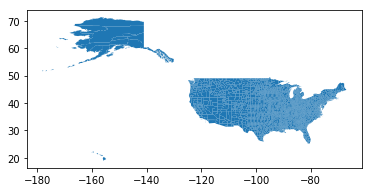

In [5]:
gdf.plot()

## Filtering

Remove few states

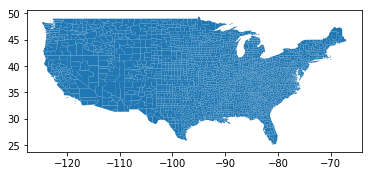

In [6]:
gdf_us = gdf[~gdf.STATE_NAME.isin(['Alaska', 'Hawaii'])]
gdf_us.plot()

## Virginia

Let's focus on Virginia for a bit

In [7]:
gdf_va = gdf[gdf.STATE_NAME.eq('Virginia')]
gdf_va.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
1146,Frederick,Virginia,51,069,51069,POLYGON ((-78.15430869819474 39.04069962609129...
1176,Loudoun,Virginia,51,107,51107,POLYGON ((-77.65707125196792 38.94079999118975...
1187,Clarke,Virginia,51,043,51043,POLYGON ((-78.00282389592557 38.97931116590919...
1206,Winchester,Virginia,51,840,51840,POLYGON ((-78.13251966018851 39.19174663242321...
1236,Shenandoah,Virginia,51,171,51171,POLYGON ((-78.64513959066878 38.60881592844102...


Basic plot

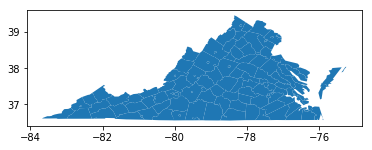

In [8]:
gdf_va.plot()

Styling the plot

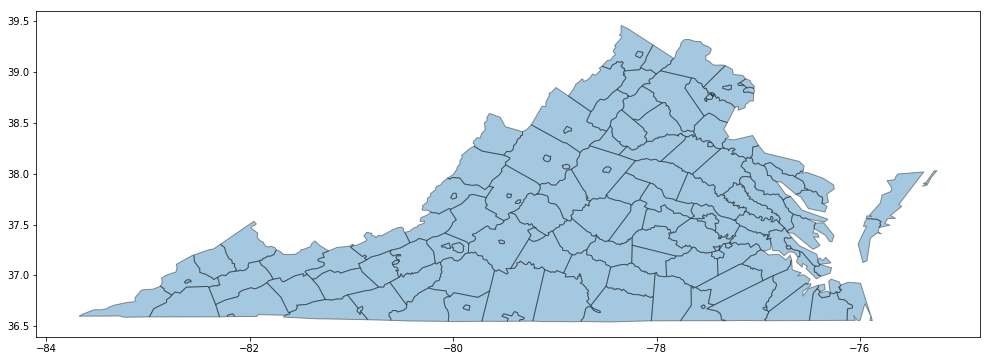

In [9]:
ax = gdf_va.plot(figsize=(18, 6), alpha=0.4, edgecolor='k')

Taking a closer look at properties

In [10]:
gdf_va.iloc[0:3]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
1146,Frederick,Virginia,51,069,51069,POLYGON ((-78.15430869819474 39.04069962609129...
1176,Loudoun,Virginia,51,107,51107,POLYGON ((-77.65707125196792 38.94079999118975...
1187,Clarke,Virginia,51,043,51043,POLYGON ((-78.00282389592557 38.97931116590919...


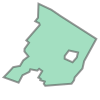

In [11]:
# __repr__ plot the first row
gdf_va.iloc[0].geometry

In [12]:
# get the bounds of a shape
gdf_va.geometry.iloc[0].bounds

(-78.53665141587346, 39.01085039758948, -78.03332834191815, 39.456998182085854)

GeoDataFrame Ops

In [13]:
# area of each county
gdf_va.geometry.area

1146    0.110033
1176    0.142747
1187    0.048063
1206    0.003058
1236    0.135449
          ...   
1796    0.002265
1797    0.000842
1807    0.001319
3132    0.251756
3133    0.010840
Length: 134, dtype: float64

In [14]:
# boundary of each county
gdf_va.geometry.boundary

1146    (LINESTRING (-78.15430869819474 39.04069962609...
1176    LINESTRING (-77.65707125196792 38.940799991189...
1187    LINESTRING (-78.00282389592557 38.979311165909...
1206    LINESTRING (-78.13251966018851 39.191746632423...
1236    LINESTRING (-78.64513959066878 38.608815928441...
                              ...                        
1796    LINESTRING (-80.90521778268827 36.642988565710...
1797    LINESTRING (-76.91497372470884 36.686658801109...
1807    LINESTRING (-82.21666128525658 36.594072342454...
3132    LINESTRING (-79.71720165200327 36.548027876125...
3133    LINESTRING (-79.51976749562056 36.597770270201...
Length: 134, dtype: object

In [15]:
# get bounds for each shape
gdf_va.geometry.bounds

,minx,miny,maxx,maxy
1146,-78.536651,39.010850,-78.033328,39.456998
1176,-77.961594,38.850703,-77.324307,39.318781
1187,-78.154309,38.979311,-77.830680,39.265639
1206,-78.205206,39.138563,-78.132520,39.202817
1236,-78.866561,38.608816,-78.301849,39.103011
...,...,...,...,...
1796,-80.944831,36.614554,-80.886693,36.695962
1797,-76.953488,36.656733,-76.914974,36.688562
1807,-82.221407,36.594072,-82.152213,36.621750
3132,-79.717202,36.547796,-79.099419,37.140192


In [16]:
# get bounds of the collection of counties
gdf_va.geometry.total_bounds

array([-83.67517677,  36.5416235 , -75.24221927,  39.45699818])

Convex hull

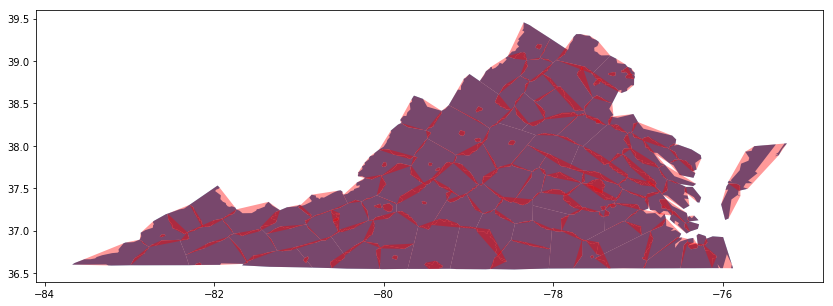

In [17]:
# plot map with state's convex hull
hulls = gdf_va['geometry'].convex_hull
hulls.plot(ax=gdf_va.plot(figsize=(15, 5)), alpha=0.4, color='r')

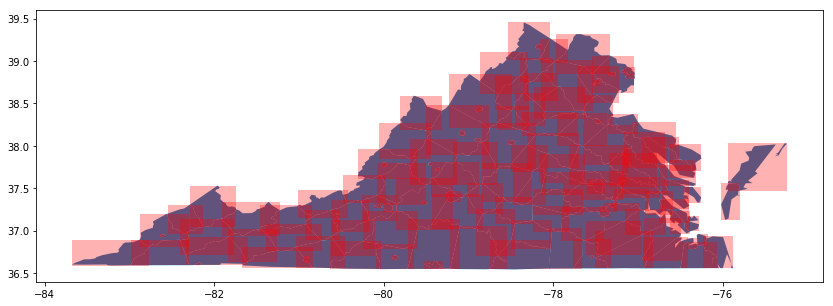

In [18]:
# plot map with state's bounding box
envelope = gpd.GeoSeries(hulls.envelope)
envelope.plot(ax=gdf_va.plot(figsize=(15, 5)), alpha=0.3, color='r')

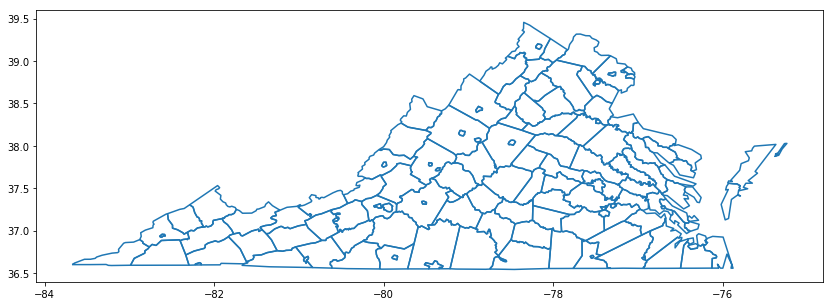

In [19]:
# plot counties's boundary
gdf_va.geometry.boundary.plot(figsize=(15, 5))

## Merging

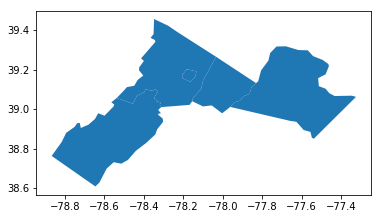

In [20]:
gdf_va.head().plot()

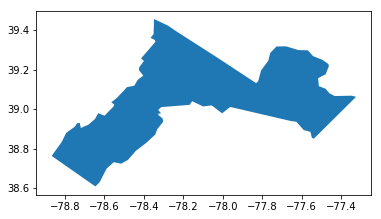

In [21]:
# merge few shapes into one
from shapely.ops import cascaded_union
boundary = gpd.GeoSeries(cascaded_union(gdf_va['geometry'].head()))
boundary.plot()

In [22]:
boundary

0    POLYGON ((-78.64513959066878 38.60881592844102...
dtype: object

In [23]:
gdf_us.shape

(3109, 6)

## Merging datasets

In [24]:
# Read data
df = pd.read_csv('county-data.csv', converters={'FIPS': str})

In [25]:
# See few ros
df.head()

,FIPS,state,county,housing_units,population,median_household_income,insured
0,01001,AL,Autauga County,22135,55416.0,56580.0,77.2
1,01003,AL,Baldwin County,104061,208563.0,52387.0,69.0
2,01005,AL,Barbour County,11829,25965.0,31433.0,62.3
3,01007,AL,Bibb County,8981,22643.0,40767.0,66.6
4,01009,AL,Blount County,23887,57704.0,50487.0,70.6


In [27]:
# merge on FIPS key/column
gdf_usm = gdf_us.merge(df, on=['FIPS'])

In [28]:
# merged data
gdf_usm.head(3)

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,state,county,housing_units,population,median_household_income,insured
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283127277658 48.546679319076, ...",MN,Lake of the Woods County,3672,3814.0,46128.0,73.6
1,Ferry,Washington,53,019,53019,POLYGON ((-118.8516288013387 47.94956368481996...,WA,Ferry County,4403,7614.0,40747.0,66.5
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.438831576286 48.04411548512263,...",WA,Stevens County,21156,44439.0,42845.0,70.3


Which counties are insured well?

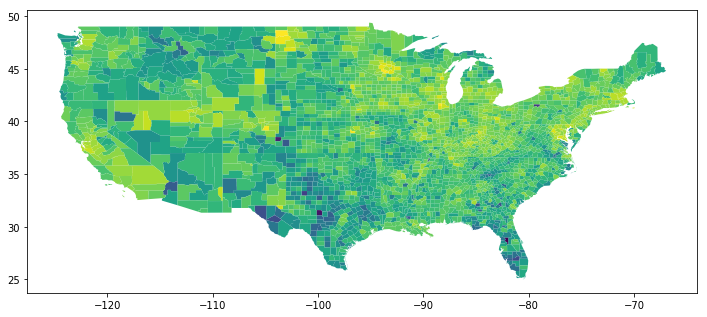

In [29]:
gdf_usm.plot(column='insured', figsize=(12, 9))

### What are the most common county names?

In [30]:
gdf_usm['NAME'].value_counts().head(10)

Washington    31
Jefferson     26
Franklin      25
Jackson       24
Lincoln       24
Madison       20
Montgomery    18
Clay          18
Union         18
Marion        17
Name: NAME, dtype: int64

The Lincoln Counties

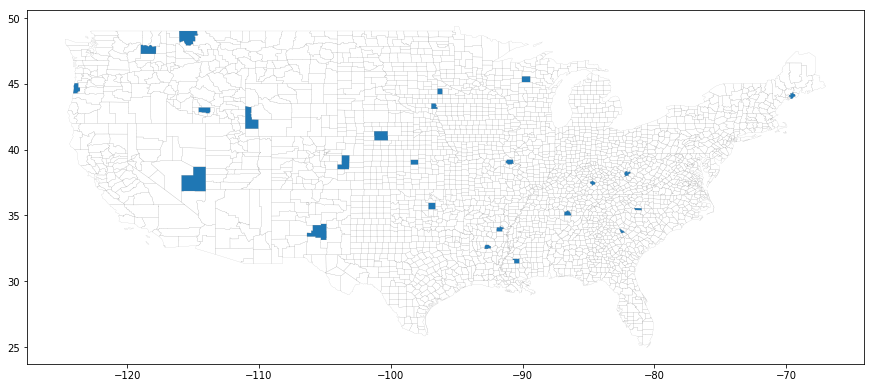

In [31]:
ax = gdf_usm.geometry.boundary.plot(linewidth=0.1, edgecolor='grey', figsize=(15, 9))
gdf_usm[gdf_usm['NAME'].str.contains('Lincoln')].plot(ax=ax)

### Aggregation

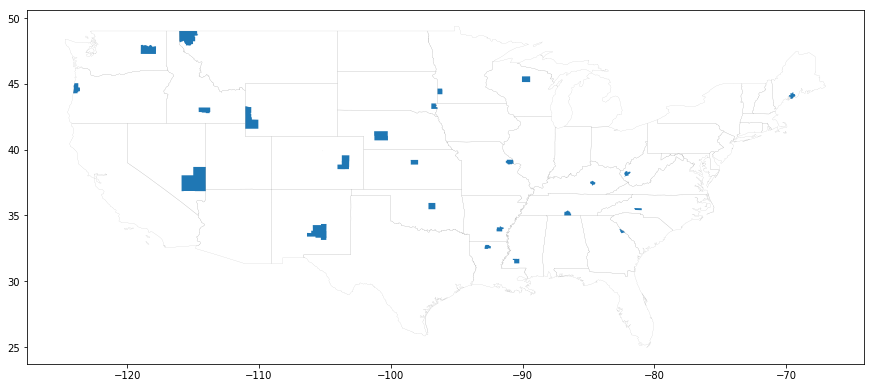

In [32]:
# Aggregation with dissolve
gdf_usm_states = gdf_usm.dissolve(by='STATE_NAME')
ax = gdf_usm_states.geometry.boundary.plot(linewidth=0.1, edgecolor='grey', figsize=(15, 9))
gdf_usm[gdf_usm['NAME'].str.contains('Lincoln')].plot(ax=ax)

## Spatial Vector Geometries

Points, Linestrings and Polygons

In [33]:
print(gdf_usm.geometry[0])

POLYGON ((-95.34283127277658 48.546679319076, -95.34105289190684 48.71517195733587, -95.09435905148669 48.71735751795556, -95.09491035007436 48.91176243313237, -95.13382124476209 48.89448474990026, -95.21957848050616 48.87944650348885, -95.29026017093044 48.90294958174785, -95.31417172404038 48.93207199957641, -95.30375729897271 48.94593890485217, -95.32091645456259 48.96097699585145, -95.32323587682019 48.97895631299366, -95.31012059635258 48.993395445689, -95.27665710362751 48.99999118779381, -95.15774989320504 48.9999959019614, -95.15186733731112 49.37173013664074, -94.83203924782775 49.33080592976444, -94.68124996659202 48.87716132370133, -94.69443202246646 48.77761551038913, -94.57031275583246 48.71367627110933, -94.43063445677862 48.71078529488466, -94.43169006769017 48.36821243467153, -95.21178803364391 48.36900472565064, -95.21983978008106 48.54435777285279, -95.34283127277658 48.546679319076))


## More data, intersections, merge
Cities, Rivers

In [34]:
gdf_cities = gpd.read_file("zip://ne_110m_populated_places.zip")
# http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_populated_places.zip
gdf_cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Lobamba,POINT (31.19999710971274 -26.46666746135247)
4,Luxembourg,POINT (6.130002806227083 49.61166037912108)


In [35]:
gdf_rivers = gpd.read_file("zip://ne_50m_rivers_lake_centerlines.zip")
# http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_rivers_lake_centerlines.zip
gdf_rivers.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,name_en,min_label,geometry
0,6,Lake Centerline,Kama,None,5.0,None,Kama,6.0,LINESTRING (51.9371337598152 55.70106609892139...
1,6,River,Kama,None,5.0,None,Kama,6.0,LINESTRING (53.69384765584471 58.2063174502901...
2,3,Lake Centerline,Abay,None,3.0,None,Abay,4.0,LINESTRING (37.11301150887408 11.8549872909308...
3,3,Lake Centerline,Al Furat,None,3.0,None,Al Furat,4.0,LINESTRING (38.56119184742585 35.8626433379197...
4,6,Lake Centerline,Alabama,None,5.0,None,Alabama,6.0,(LINESTRING (-86.52176754393696 33.03211843501...


## Overlay plots

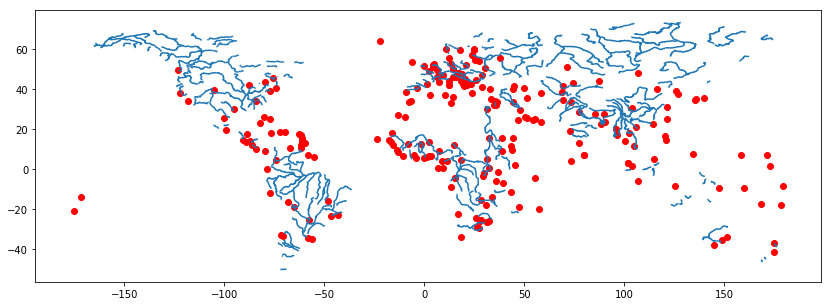

In [36]:
ax = gdf_rivers.plot(figsize=(15, 5))
gdf_cities.plot(ax=ax, color='red')

[(24.956376423110417, 49.371730136640736),
 (-124.73276977152562, -66.96927103600244)]

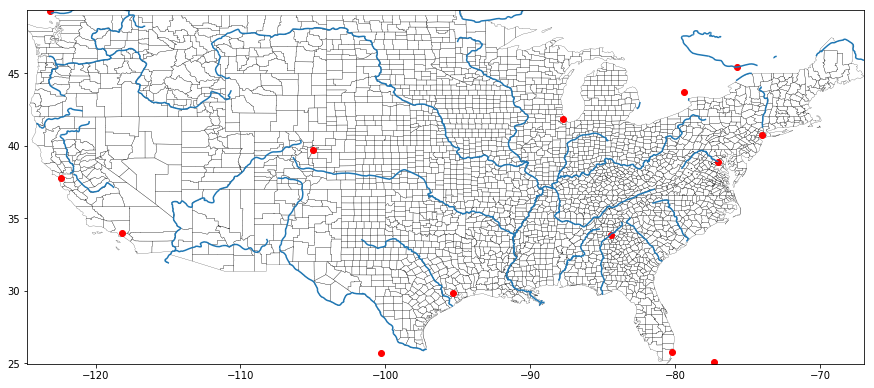

In [37]:
x0, y0, x1, y1 = gdf_usm.geometry.total_bounds

ax = gdf.plot(edgecolor='k', linewidth=0.2, facecolor='none', figsize=(15, 10))
gdf_rivers.plot(ax=ax)
gdf_cities.plot(ax=ax, color='red')
ax.set(xlim=(x0, x1), ylim=(y0, y1))

## Creating Geometries

In [38]:
from shapely.geometry import Point, Polygon, LineString

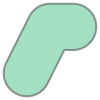

In [39]:
line = LineString([(0, 0), (1, 2), (2, 2)])
poly = line.buffer(1)
poly

In [40]:
poly.contains(line)

True

Create data from Lat Long

In [41]:
df1 = pd.DataFrame([
    {'city': 'Reston', 'Latitude': 38.9586, 'Longitude': -77.3570},
    {'city': 'Princeton', 'Latitude': 40.3573, 'Longitude': -74.6672},
    ])
df1['Point'] = [Point(*x) for x in zip(df1.Longitude, df1.Latitude)]
gdf1 = gpd.GeoDataFrame(df1, geometry='Point')
gdf1

,city,Latitude,Longitude,Point
0,Reston,38.9586,-77.3570,POINT (-77.357 38.9586)
1,Princeton,40.3573,-74.6672,POINT (-74.66719999999999 40.3573)


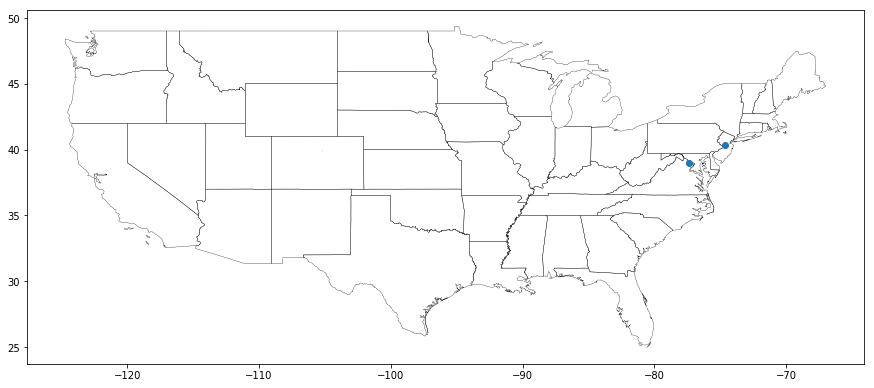

In [42]:
ax = gdf_usm_states.plot(edgecolor='k', linewidth=0.3, facecolor='none', figsize=(15, 10))
gdf1.plot(ax=ax)

In [43]:
# filtering shapes/frames
gdf_usm[gdf_usm.contains(gdf1.iloc[0, -1])]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,state,county,housing_units,population,median_household_income,insured
1244,Fairfax,Virginia,51,059,51059,"POLYGON ((-77.0451474330396 38.78823393500949,...",VA,Fairfax County,407998,1138652.0,112844.0,79.6


### Where is Mississippi river?

In [44]:
mississippi = gdf_rivers[gdf_rivers['name'].eq('Mississippi') & gdf_rivers['featurecla'].eq('River')]
mississippi

,scalerank,featurecla,name,note,min_zoom,name_alt,name_en,min_label,geometry
281,1,River,Mississippi,None,2.0,None,Mississippi,3.0,(LINESTRING (-89.37614112031639 28.98133209929...


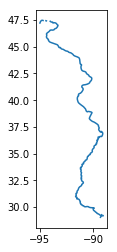

In [45]:
mississippi.plot()

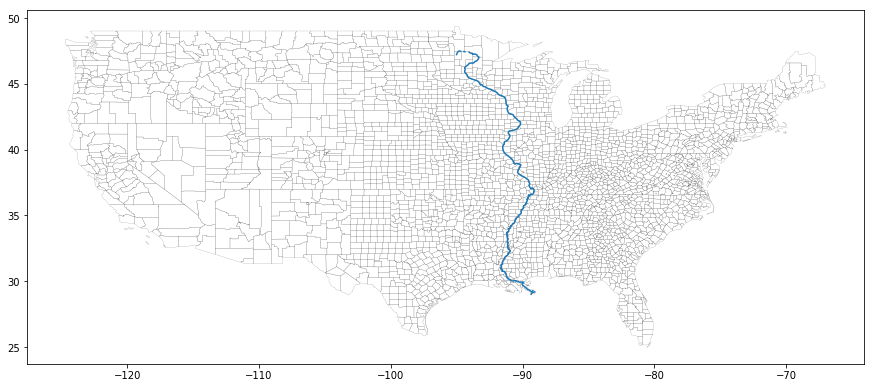

In [46]:
ax = gdf_usm.plot(edgecolor='k', linewidth=0.1, facecolor='none', figsize=(15, 10))
mississippi.plot(ax=ax)

In [47]:
# Missouri crosses through these counties
gdf_usm[gdf_usm.crosses(mississippi.geometry.squeeze())]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,state,county,housing_units,population,median_household_income,insured
41,Beltrami,Minnesota,27,007,27007,POLYGON ((-95.58913974294738 48.02091281848831...,MN,Beltrami County,20527,46106.0,46031.0,73.3
73,Itasca,Minnesota,27,061,27061,POLYGON ((-93.08139799069356 47.89497243265204...,MN,Itasca County,27065,45242.0,52064.0,73.3
97,Cass,Minnesota,27,021,27021,POLYGON ((-94.73398274884524 46.36801682166771...,MN,Cass County,24903,28993.0,47645.0,67.7
100,Hubbard,Minnesota,27,057,27057,POLYGON ((-95.16521288673401 46.80501694527271...,MN,Hubbard County,14622,20718.0,52841.0,70.1
121,Aitkin,Minnesota,27,001,27001,POLYGON ((-93.05216455680851 46.15762507631342...,MN,Aitkin County,16029,15583.0,43817.0,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2819,Orleans,Louisiana,22,071,22071,POLYGON ((-89.91164200589763 29.88276418055263...,LA,Orleans Parish,189896,391495.0,38640.0,72.4
2825,St. Charles,Louisiana,22,089,22089,"POLYGON ((-90.2022476439523 29.70495215101066,...",LA,St. Charles Parish,19896,52923.0,61601.0,77.1
2839,Plaquemines,Louisiana,22,075,22075,POLYGON ((-90.00124491450912 29.90345290076129...,LA,Plaquemines Parish,9596,23464.0,49122.0,73.9
2867,Jefferson,Louisiana,22,051,22051,(POLYGON ((-90.00124491450912 29.9034529007612...,LA,Jefferson Parish,189135,436523.0,49503.0,70.8


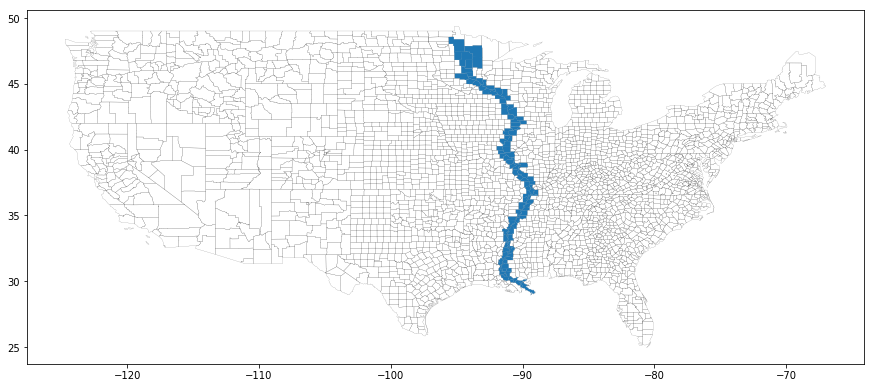

In [48]:
ax = gdf_usm.plot(edgecolor='k', linewidth=0.1, facecolor='none', figsize=(15, 10))
gdf_usm[gdf_usm.crosses(mississippi.geometry.squeeze())].plot(ax=ax)

In [49]:
# Spatial joins on frames
gdf2 = gdf_cities[gdf_cities.within(gdf_usm.geometry.unary_union)]
gdf2

,name,geometry
175,San Francisco,POINT (-122.4171687735522 37.76919562968743)
176,Denver,POINT (-104.9859618109682 39.7411339069655)
177,Houston,POINT (-95.34192514914599 29.82192024318886)
178,Miami,POINT (-80.22605193945003 25.78955655502153)
179,Atlanta,POINT (-84.40189524187565 33.83195971260585)
180,Chicago,POINT (-87.75200083270931 41.83193651927843)
216,Los Angeles,POINT (-118.1819263699404 33.99192410876543)
217,"Washington, D.C.",POINT (-77.01136443943716 38.90149523508705)
218,New York,POINT (-73.98196278740681 40.75192492259464)


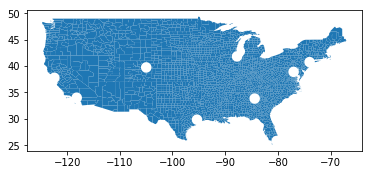

In [50]:
cities_thick = gdf2.assign(geometry=gdf2.buffer(1))
gpd.overlay(gdf_usm, cities_thick, how='difference').plot()

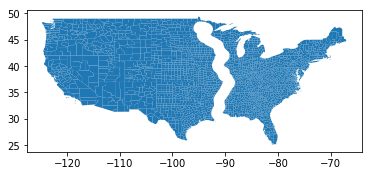

In [51]:
mississippi_thick = mississippi.assign(geometry=mississippi.buffer(1))
gpd.overlay(gdf_usm, mississippi_thick, how='difference').plot()

# Cleaning

For cleaning shapefiles, merging multiple shapefiles, minifying files with shapely

In [52]:
from shapely.geometry import shape, mapping
 
shp = mapping(gdf.geometry[0])
shp

{'type': 'Polygon',
 'coordinates': (((-95.34283127277658, 48.546679319076),
   (-95.34105289190684, 48.71517195733587),
   (-95.09435905148669, 48.71735751795556),
   (-95.09491035007436, 48.91176243313237),
   (-95.13382124476209, 48.89448474990026),
   (-95.21957848050616, 48.87944650348885),
   (-95.29026017093044, 48.902949581747855),
   (-95.31417172404038, 48.93207199957641),
   (-95.30375729897271, 48.94593890485217),
   (-95.32091645456259, 48.96097699585145),
   (-95.32323587682019, 48.97895631299366),
   (-95.31012059635258, 48.993395445689),
   (-95.27665710362751, 48.99999118779381),
   (-95.15774989320504, 48.9999959019614),
   (-95.15186733731112, 49.371730136640736),
   (-94.83203924782775, 49.33080592976444),
   (-94.68124996659202, 48.87716132370133),
   (-94.69443202246646, 48.777615510389126),
   (-94.57031275583246, 48.71367627110933),
   (-94.43063445677862, 48.71078529488466),
   (-94.43169006769017, 48.368212434671534),
   (-95.21178803364391, 48.36900472565064)

In [53]:
shp['coordinates'] = pd.np.round(pd.np.array(shp['coordinates']), 2)
shp

{'type': 'Polygon', 'coordinates': array([[[-95.34,  48.55],
         [-95.34,  48.72],
         [-95.09,  48.72],
         [-95.09,  48.91],
         [-95.13,  48.89],
         [-95.22,  48.88],
         [-95.29,  48.9 ],
         [-95.31,  48.93],
         [-95.3 ,  48.95],
         [-95.32,  48.96],
         [-95.32,  48.98],
         [-95.31,  48.99],
         [-95.28,  49.  ],
         [-95.16,  49.  ],
         [-95.15,  49.37],
         [-94.83,  49.33],
         [-94.68,  48.88],
         [-94.69,  48.78],
         [-94.57,  48.71],
         [-94.43,  48.71],
         [-94.43,  48.37],
         [-95.21,  48.37],
         [-95.22,  48.54],
         [-95.34,  48.55]]])}

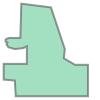

In [54]:
shape(shp)

# Some Topological operations

In [55]:
fairfax = gdf[gdf['NAME'].eq('Fairfax')]
fairfax

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
1244,Fairfax,Virginia,51,059,51059,"POLYGON ((-77.0451474330396 38.78823393500949,..."


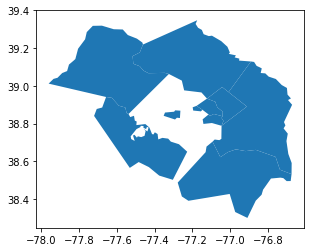

In [56]:
# fairfax's neighbours
gdf[gdf.geometry.touches(fairfax.geometry.iloc[0])].plot()

In [57]:
# States with larger boundaries
gdf_us.loc[gdf_us.geometry.length.sort_values(ascending=False).index].head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
1217,Nye,Nevada,32,023,32023,"POLYGON ((-115.8813700687959 36.8388988544697,..."
1730,Coconino,Arizona,04,005,04005,POLYGON ((-113.3202604167654 35.54080613353226...
1986,San Bernardino,California,06,071,06071,POLYGON ((-117.7832161273662 33.95076200920374...
1744,Mohave,Arizona,04,015,04015,POLYGON ((-114.1534149920229 34.33644774515523...
606,Elko,Nevada,32,007,32007,POLYGON ((-115.8221963867118 40.12675147188308...


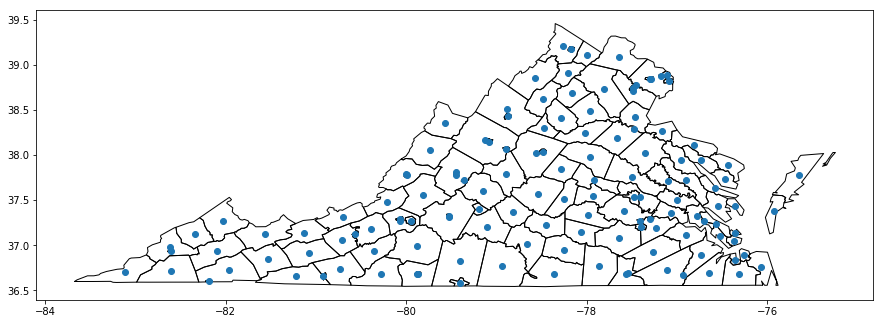

In [58]:
# VA counties geometric capitals

ax = gdf_va.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
gdf_va.geometry.centroid.plot(ax=ax)

## Explore

- Fiona (read and write spatial data)
- Shapely (geometry objects and metrics)
- geopandas (Pandas-like interface for manipulating spatial data)
- cartoPy (plotting)
- Rasterio (work with raster images)
- folium (leaflet maps)
- GDAL (library for reading and writing raster and vector geospatial data formats)
- PySAL (geospatial data science with an emphasis on geospatial vector data)